<a href="https://colab.research.google.com/github/lmcanavals/machine_learning/blob/main/0503_Regularization_Hiperparameters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Trees

#### Imports and setup

In [19]:
from sklearn.datasets import make_moons
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz as gv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

#### Loading Data

In [20]:
X, y = make_moons(n_samples=250, noise=.2, random_state=42)
print(X.shape, y.shape)

(250, 2) (250,)


## Basic decision tree

In [21]:
tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf=5, random_state=42)
tree_clf1.fit(X, y)
tree_clf2.fit(X, y)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

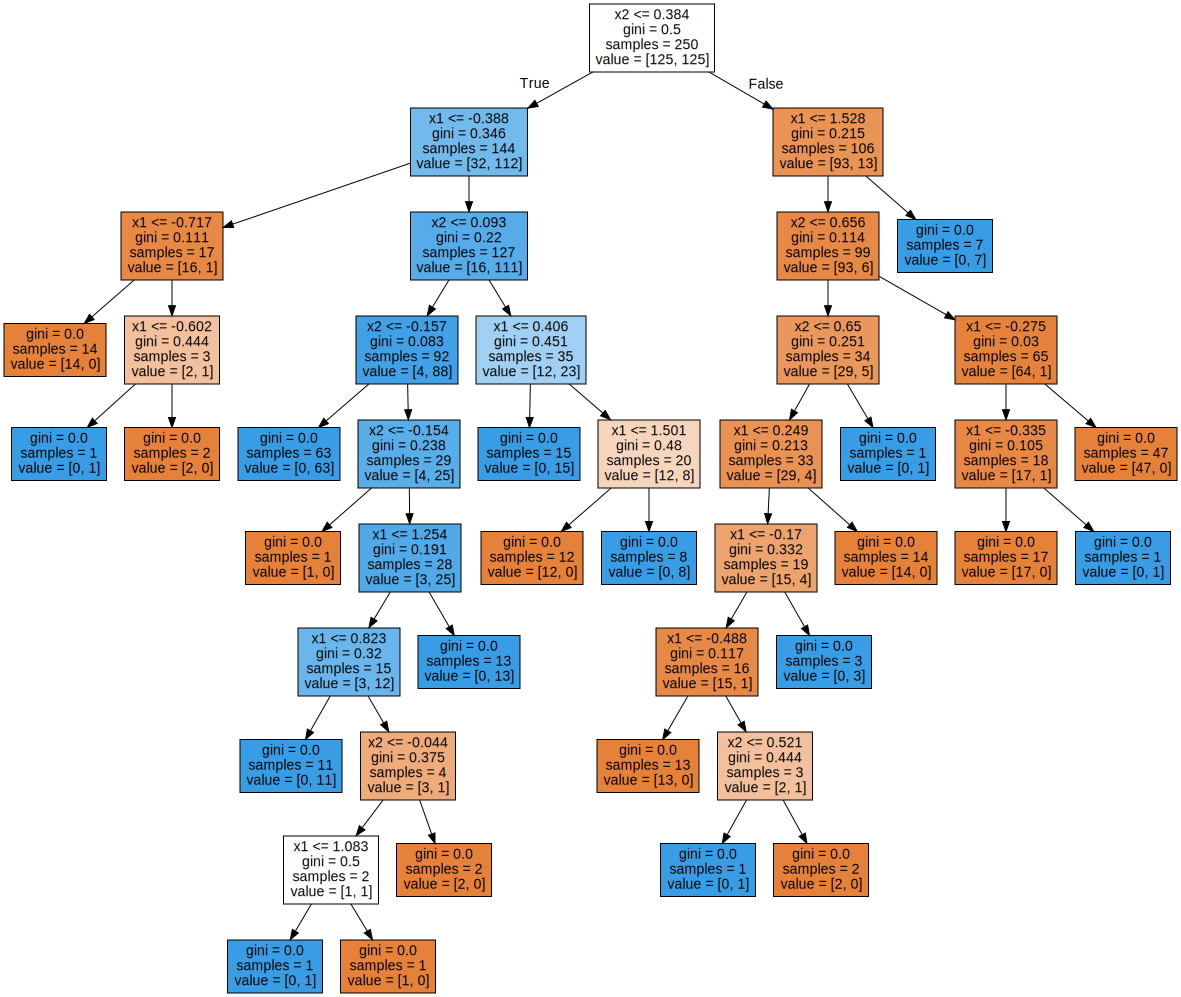

In [22]:
dot = export_graphviz(tree_clf1,
                      feature_names=['x1', 'x2'],
                      filled=True)
gv.Source(dot)

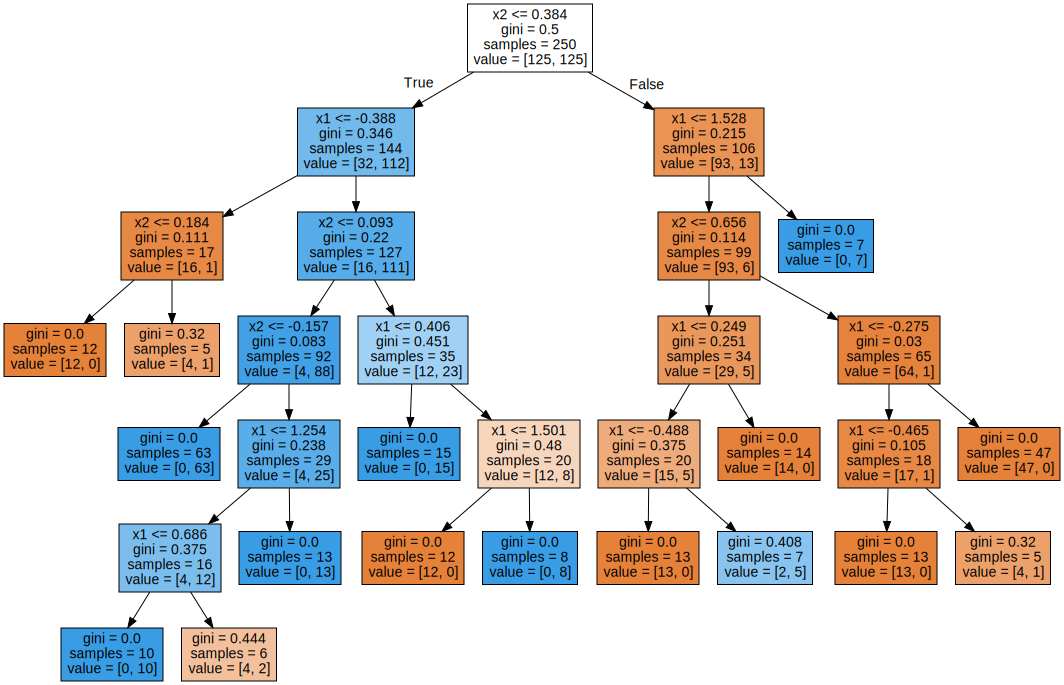

In [23]:
dot = export_graphviz(tree_clf2,
                      feature_names=['x1', 'x2'],
                      filled=True)
gv.Source(dot)

In [24]:
def plot_decision_boundary(clf, X, y, axes, cmap):
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=.3, cmap=cmap)
    plt.contour(x1, x2, y_pred, alpha=.8, cmap='Greys')
    colors = {'Wistia': ['#78785c', '#c47b27'], 'Pastel1': ['red', 'blue']}
    markers = ['o', '^']
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[cmap][idx], marker=markers[idx], linestyle='none')
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)


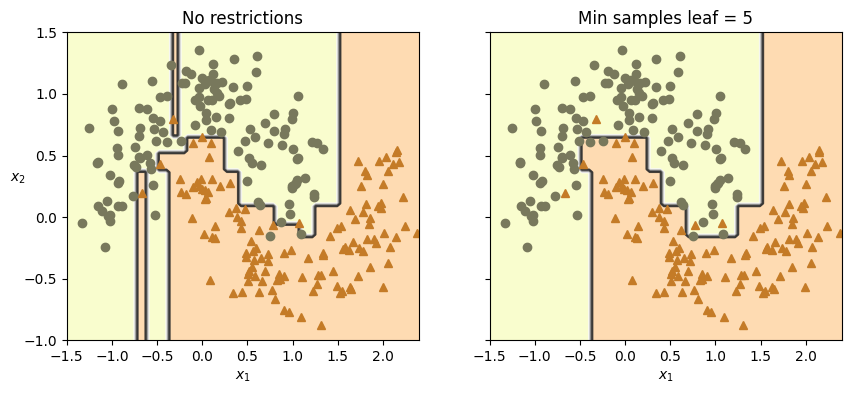

In [26]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X, y,
                       axes=[-1.5, 2.4, -1, 1.5], cmap='Wistia')
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X, y,
                       axes=[-1.5, 2.4, -1, 1.5], cmap='Wistia')
plt.title(f"Min samples leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()
